In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [3]:
colors_dict = {'Ukraine': '#E58606',
             'Moldova': '#5D69B1',
             'Greece': '#52BCA3',
             'Slovakia': '#99C945',
             'Romania': '#A5AA99',
             'Hungary': '#24796C',
             'Spain': '#DAA51B',
             'Israel': '#2F8AC4',
             'Italy': '#764E9F',
             'France': '#ED645A',
             'Canada': '#CC3A8E',
             'Australia': '#CC61B0',
             'Germany': '#88CCEE',
             'Austria': '#DDCC77',
             'Sweden': '#117733',
             'United States': '#332288',
             'Switzerland': '#661100',
             'Other countries': '#f97b72'}

In [4]:
df_path = 'immigrants_emigrants.ods'
df = pd.read_excel(df_path, engine = 'odf', index_col=0)

In [5]:
df

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2017,2018,2019,2020,2021,data_type,lat,lon,aerial_distance,angle
0,Australia,611.0,301.0,297.0,236.0,220.0,136.0,165.0,207.0,206.0,...,114,128,176,91,115,emigrants,-35.266667,149.133333,15141.624431,122.934841
1,Austria,3459.0,4630.0,3282.0,1296.0,1256.0,2276.0,915.0,1551.0,941.0,...,1531,1746,2004,1623,2581,emigrants,48.200000,16.366667,857.742440,291.155756
2,Canada,1894.0,1661.0,1591.0,1926.0,1523.0,2286.0,2123.0,2331.0,1945.0,...,1048,1126,1163,379,1242,emigrants,45.416667,-75.700000,7433.199076,270.553429
3,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,260,290,287,255,496,emigrants,46.916667,7.466667,1474.135161,277.591287
4,France,1626.0,1512.0,1235.0,937.0,787.0,1438.0,2181.0,1143.0,846.0,...,890,1075,1030,768,1312,emigrants,48.866667,2.333333,1876.310452,280.566275
5,Germany,66121.0,20001.0,13813.0,6874.0,6880.0,9010.0,6467.0,5807.0,3899.0,...,4088,3961,3671,4257,5121,emigrants,52.516667,13.400000,1296.375823,302.476057
6,Greece,576.0,354.0,143.0,80.0,87.0,193.0,274.0,232.0,316.0,...,177,184,134,111,203,emigrants,37.983333,23.733333,743.222736,200.149355
7,Israel,1227.0,519.0,463.0,324.0,417.0,316.0,418.0,554.0,563.0,...,66,61,81,96,143,emigrants,31.766667,35.233333,1615.739530,144.206413
8,Italy,1130.0,1396.0,528.0,645.0,1580.0,2195.0,1640.0,1706.0,1877.0,...,3449,4553,4966,3094,4986,emigrants,41.900000,12.483333,1141.013579,259.460817
9,Slovakia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14,17,20,12,11,emigrants,48.150000,17.116667,805.359671,292.476305


### Per country

In [6]:
emigrants_df = df.loc[df['data_type'] == 'emigrants', :].copy()

emigrants_df['total'] = emigrants_df.loc[:, '1990':'2021'].sum(axis=1)
emigrants_df.sort_values('total', ascending=False, inplace=True)

emigrants_df.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2018,2019,2020,2021,data_type,lat,lon,aerial_distance,angle,total
5,Germany,66121.0,20001.0,13813.0,6874.0,6880.0,9010.0,6467.0,5807.0,3899.0,...,3961,3671,4257,5121,emigrants,52.516667,13.400000,1296.375823,302.476057,198644.0
14,Other countries,3730.0,3208.0,2288.0,1010.0,1363.0,2504.0,2367.0,1841.0,2640.0,...,5458,5613,4899,10049,emigrants,0.000000,0.000000,0.000000,0.000000,81438.0
8,Italy,1130.0,1396.0,528.0,645.0,1580.0,2195.0,1640.0,1706.0,1877.0,...,4553,4966,3094,4986,emigrants,41.900000,12.483333,1141.013579,259.460817,68923.0
11,United States,4924.0,5770.0,2100.0,1245.0,1078.0,2292.0,3181.0,2861.0,2868.0,...,1243,1227,777,1695,emigrants,38.883333,-77.000000,7996.334787,266.918671,60355.0
10,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6910,5891,4373,5970,emigrants,40.400000,-3.683333,2477.741899,262.287780,56896.0


In [7]:
immigrants_df = df.loc[df['data_type'] == 'immigrants', :].copy()

immigrants_df['total'] = immigrants_df.loc[:, '1990':'2021'].sum(axis=1)
immigrants_df.sort_values('total', ascending=False, inplace=True)

immigrants_df

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2018,2019,2020,2021,data_type,lat,lon,aerial_distance,angle,total
21,Moldova,NaN,NaN,NaN,NaN,62.0,1019.0,372.0,3044.0,8908.0,...,36810,38205,19912,31041,immigrants,47.000000,28.850000,356.633566,46.974934,320571.0
25,Other countries,NaN,NaN,NaN,NaN,184.0,706.0,256.0,536.0,473.0,...,16269,16162,7385,10038,immigrants,0.000000,0.000000,0.000000,0.000000,107397.0
23,Ukraine,NaN,NaN,NaN,NaN,1.0,24.0,10.0,95.0,418.0,...,9040,6196,2438,4006,immigrants,50.433333,30.516667,745.325982,36.357199,34655.0
20,Italy,NaN,NaN,NaN,NaN,19.0,133.0,47.0,111.0,106.0,...,1073,1123,715,1079,immigrants,41.900000,12.483333,1141.013579,259.460817,16490.0
18,Germany,NaN,NaN,NaN,NaN,229.0,739.0,318.0,539.0,480.0,...,815,984,709,1118,immigrants,52.516667,13.400000,1296.375823,302.476057,13137.0
22,United States,NaN,NaN,NaN,NaN,80.0,325.0,104.0,324.0,252.0,...,580,584,336,774,immigrants,38.883333,-77.000000,7996.334787,266.918671,10375.0
17,France,NaN,NaN,NaN,NaN,79.0,460.0,471.0,942.0,341.0,...,256,300,167,331,immigrants,48.866667,2.333333,1876.310452,280.566275,6055.0
16,Canada,NaN,NaN,NaN,NaN,12.0,74.0,56.0,132.0,96.0,...,320,398,223,740,immigrants,45.416667,-75.700000,7433.199076,270.553429,5905.0
24,Hungary,NaN,NaN,NaN,NaN,60.0,280.0,102.0,340.0,434.0,...,204,202,142,222,immigrants,47.500000,19.083333,641.468799,293.607955,5574.0
15,Austria,NaN,NaN,NaN,NaN,121.0,536.0,288.0,387.0,235.0,...,171,184,137,285,immigrants,48.200000,16.366667,857.742440,291.155756,4237.0


/tmp/ipykernel_6028/2543671130.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
/tmp/ipykernel_6028/2543671130.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])


Text(0.5, 1.0, 'Emigration from Romania between 1990-2021 based on destination')

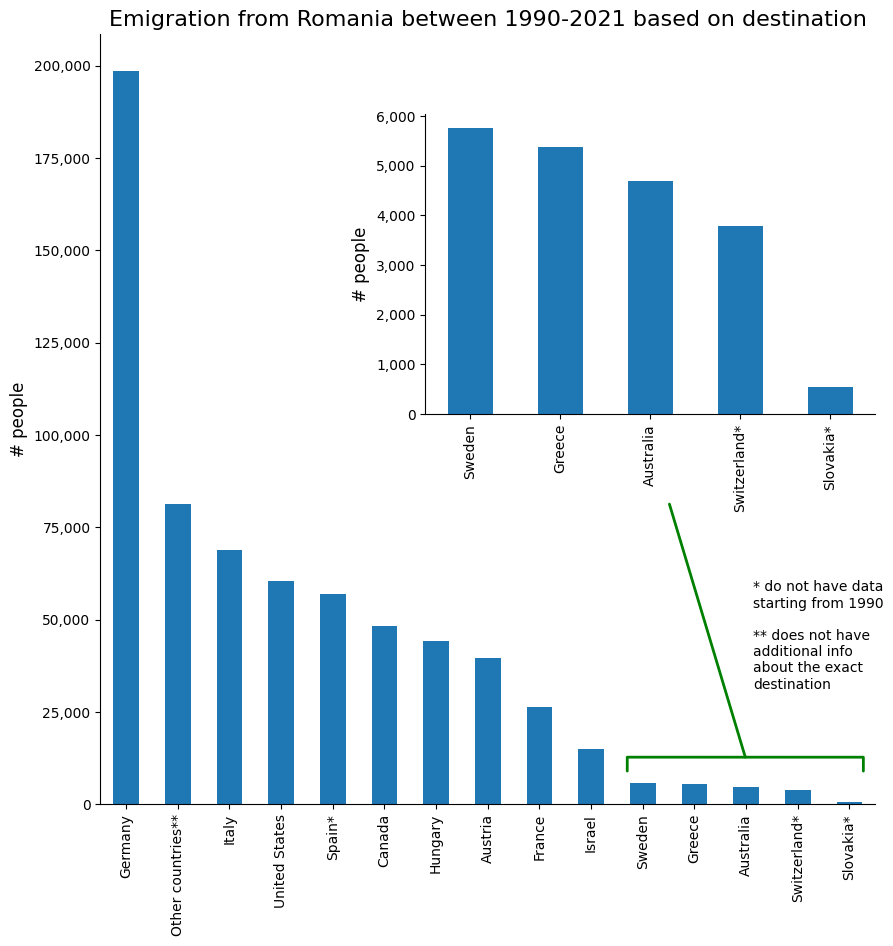

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
emigrants_df.plot.bar(y='total', x='country', ax=ax, label='')

ax.get_legend().remove()
ax.axes.get_xaxis().set_label_text('')
plt.xticks(rotation = 90, ha='center');

def add_stars(df, x):
    if df['country'].iloc[x] == 'Other countries':
        return '**'
    
    if len(df.iloc[x, :].dropna()) != len(df.iloc[x, :]):
        return '*'
    return ''

ax.annotate("", xy=(10.5, 82000), xytext=(12, 12000),
            arrowprops=dict(arrowstyle=']-, widthA=8.5, lengthA=1, angleA=343.3', color='g', lw=2))

# ax.arrow(x=10.5, y=80000, dx=12, dy=10000,style=']-', color='r')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
ax.set_xticklabels(['{}{}'.format(emigrants_df['country'].iloc[x], add_stars(emigrants_df, x)) for x in ax.get_xticks().tolist()])
ax.set_ylabel('# people', fontsize=12)

# this is an inset axes over the main axes
# emigrants_df.iloc[-5:, :].plot.bar(y='total', x='country', ax=ax, label='')
# emigrants_df.iloc[-5:, :].axes.bar(y='total', x='country')
l, b, h, w = .45, .50, .3, .45
ax2 = fig.add_axes([l, b, w, h])
emigrants_df.iloc[-5:, :].plot.bar(y='total', x='country', ax=ax2, label='')
ax2.get_legend().remove()
ax2.axes.get_xaxis().set_label_text('')
ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])
ax2.set_xticklabels(['{}{}'.format(emigrants_df.iloc[-5:, :]['country'].iloc[x], add_stars(emigrants_df.iloc[-5:, :], x)) for x in ax2.get_xticks().tolist()])
plt.xticks(rotation = 90, ha='center');
ax2.set_ylabel('# people', fontsize=12)

# plt.title('Close up')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)

ax.annotate(xy=(12, 8000), xytext=(5,100), textcoords='offset points', text='* do not have data\nstarting from 1990\n\n** does not have\nadditional info\nabout the exact\ndestination', va='center', color='black', fontsize=10)

# plt.xticks([])
# plt.yticks([])

ax.set_title('Emigration from Romania between 1990-2021 based on destination', fontsize=16)

In [9]:
emigrants_per_country_plot = fig

/tmp/ipykernel_6028/1099856279.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
/tmp/ipykernel_6028/1099856279.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])


Text(0.5, 1.0, 'Immigration to Romania between 1994-2021 based on origin')

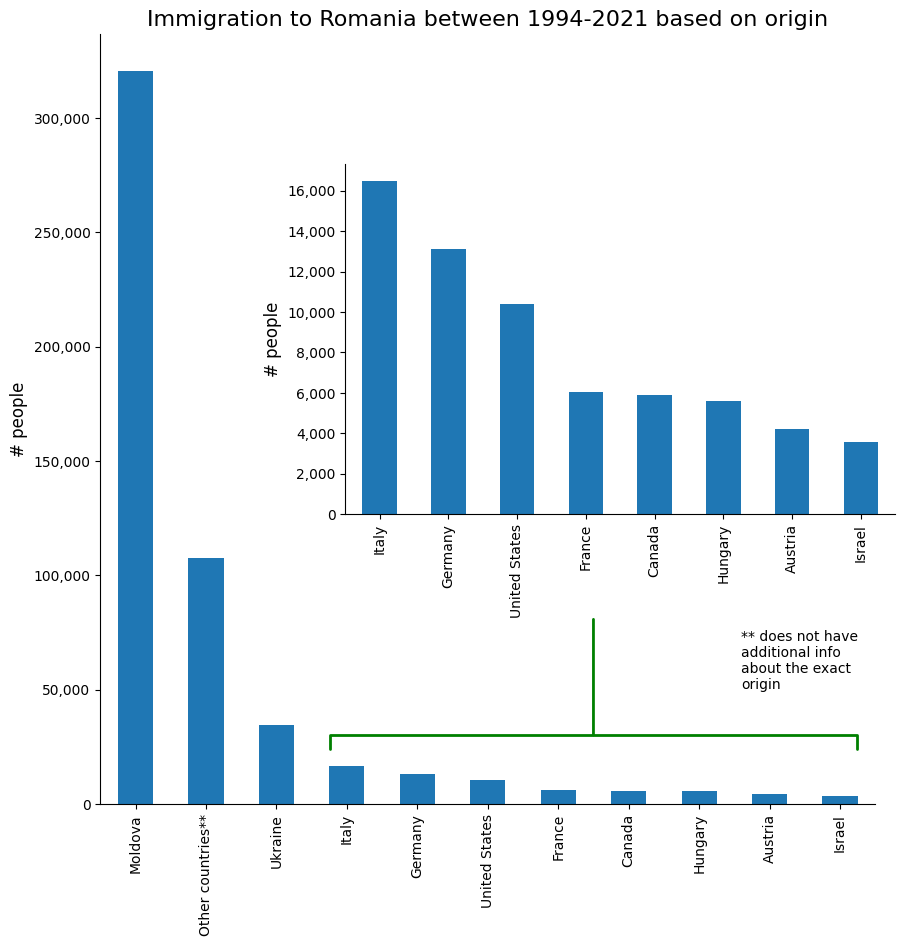

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
immigrants_df.plot.bar(y='total', x='country', ax=ax, label='')

ax.get_legend().remove()
ax.axes.get_xaxis().set_label_text('')
plt.xticks(rotation = 90, ha='center')

ax.annotate("", xy=(6.5, 82000), xytext=(6.5, 29000),
            arrowprops=dict(arrowstyle=']-, widthA=19, lengthA=1, angleA=0', color='g', lw=2))


def add_stars(df, x):
    if df['country'].iloc[x] == 'Other countries':
        return '**'
    
    if len(df.loc[:, '1994': '2021'].iloc[x, :].dropna()) != len(df.loc[:, '1994': '2021'].iloc[x, :]):
        return '*'
    return ''

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
ax.set_xticklabels(['{}{}'.format(immigrants_df['country'].iloc[x], add_stars(immigrants_df, x)) for x in ax.get_xticks().tolist()])

l, b, h, w = .37, .40, .35, .55
ax2 = fig.add_axes([l, b, w, h])
immigrants_df.iloc[-8:, :].plot.bar(y='total', x='country', ax=ax2, label='')

ax2.get_legend().remove()
ax2.axes.get_xaxis().set_label_text('')
ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])
ax2.set_xticklabels(['{}{}'.format(immigrants_df.iloc[-8:, :]['country'].iloc[x], add_stars(immigrants_df.iloc[-8:, :], x)) for x in ax2.get_xticks().tolist()])
plt.xticks(rotation = 90, ha='center');


# plt.title('Close up')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_ylabel('# people', fontsize=12)

ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.set_ylabel('# people', fontsize=12)

ax.annotate(xy=(8.5, 8000), xytext=(5,90), textcoords='offset points', text='** does not have\nadditional info\nabout the exact\norigin', va='center', color='black', fontsize=10);


ax.set_title('Immigration to Romania between 1994-2021 based on origin', fontsize=16)

In [10]:
immigrants_per_country_plot = fig

### Top 5 and last 5 years that people emigrated/immigrated most

In [11]:
emigrants_series = emigrants_df.loc[:, '1990':'2021'].sum().sort_values(ascending=False)
immigrants_series = immigrants_df.loc[:, '1994':'2021'].sum().sort_values(ascending=False)

/tmp/ipykernel_21941/3885916609.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{:,}'.format(int(x)) for x in ax[0].get_yticks().tolist()]);
/tmp/ipykernel_21941/3885916609.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['{:,}'.format(int(x)) for x in ax[1].get_yticks().tolist()]);


Text(0.5, 0.98, 'Top and last 5 years that people emigrated most')

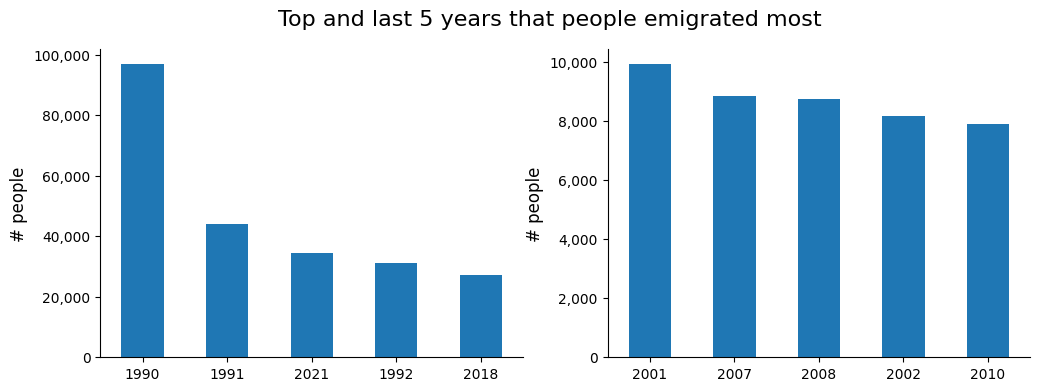

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
top_n = 5
emigrants_series.iloc[:top_n].plot.bar(ax=ax[0], label='')

ax[0].set_yticklabels(['{:,}'.format(int(x)) for x in ax[0].get_yticks().tolist()]);

ax[0].spines.right.set_visible(False)
ax[0].spines.top.set_visible(False);
ax[0].set_ylabel('# people', fontsize=12)

# ax[0].axes.get_xaxis().set_label_text('')
# plt.xticks(rotation = 90, ha='center');
ax[0].tick_params(labelrotation=0)

emigrants_series.iloc[-top_n:].plot.bar(ax=ax[1], label='')
ax[1].set_yticklabels(['{:,}'.format(int(x)) for x in ax[1].get_yticks().tolist()]);

ax[1].spines.right.set_visible(False)
ax[1].spines.top.set_visible(False);
ax[1].tick_params(labelrotation=0)
ax[1].set_ylabel('# people', fontsize=12)

fig.suptitle('Top and last 5 years that people emigrated most', fontsize=16)

In [13]:
emigrants_top_bottom_5_plot = fig

/tmp/ipykernel_21941/3885514798.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{:,}'.format(int(x)) for x in ax[0].get_yticks().tolist()]);
/tmp/ipykernel_21941/3885514798.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['{:,}'.format(int(x)) for x in ax[1].get_yticks().tolist()]);


Text(0.5, 0.98, 'Top and last 5 years that people immigrated most')

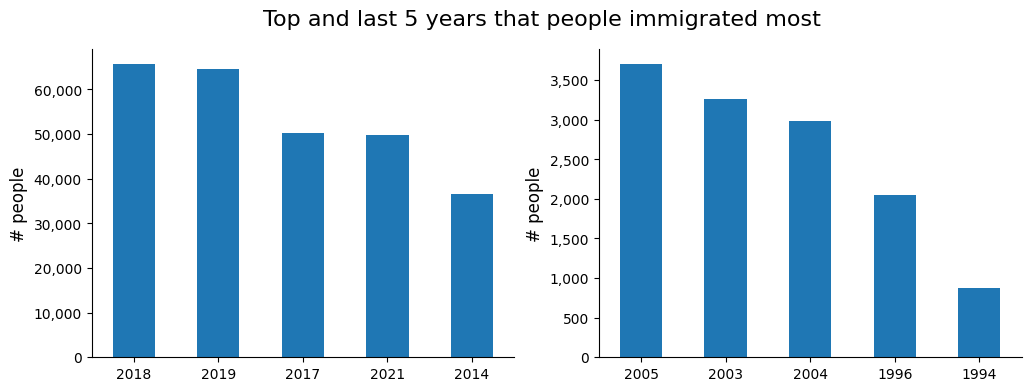

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
top_n = 5
immigrants_series.iloc[:top_n].plot.bar(ax=ax[0], label='')

ax[0].set_yticklabels(['{:,}'.format(int(x)) for x in ax[0].get_yticks().tolist()]);

ax[0].spines.right.set_visible(False)
ax[0].spines.top.set_visible(False);
ax[0].set_ylabel('# people', fontsize=12)

# ax[0].axes.get_xaxis().set_label_text('')
# plt.xticks(rotation = 90, ha='center');
ax[0].tick_params(labelrotation=0)

immigrants_series.iloc[-top_n:].plot.bar(ax=ax[1], label='')
ax[1].set_yticklabels(['{:,}'.format(int(x)) for x in ax[1].get_yticks().tolist()]);

ax[1].spines.right.set_visible(False)
ax[1].spines.top.set_visible(False);
ax[1].tick_params(labelrotation=0)
ax[1].set_ylabel('# people', fontsize=12)

fig.suptitle('Top and last 5 years that people immigrated most', fontsize=16)

In [15]:
immigrants_top_bottom_5_plot = fig

### Total number of emigrants/immigrants

In [16]:
total_emigrants = emigrants_df.loc[:, '1990':'2021'].sum().sum()

In [17]:
total_immigrants = immigrants_df.loc[:, '1990':'2021'].sum().sum()

### Line plot over years

/tmp/ipykernel_21941/2894643977.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[idx, jdx].set_yticklabels(['{:,}'.format(int(x)) for x in ax[idx, jdx].get_yticks().tolist()])


Text(0.5, 0.98, 'Emigration over time per country')

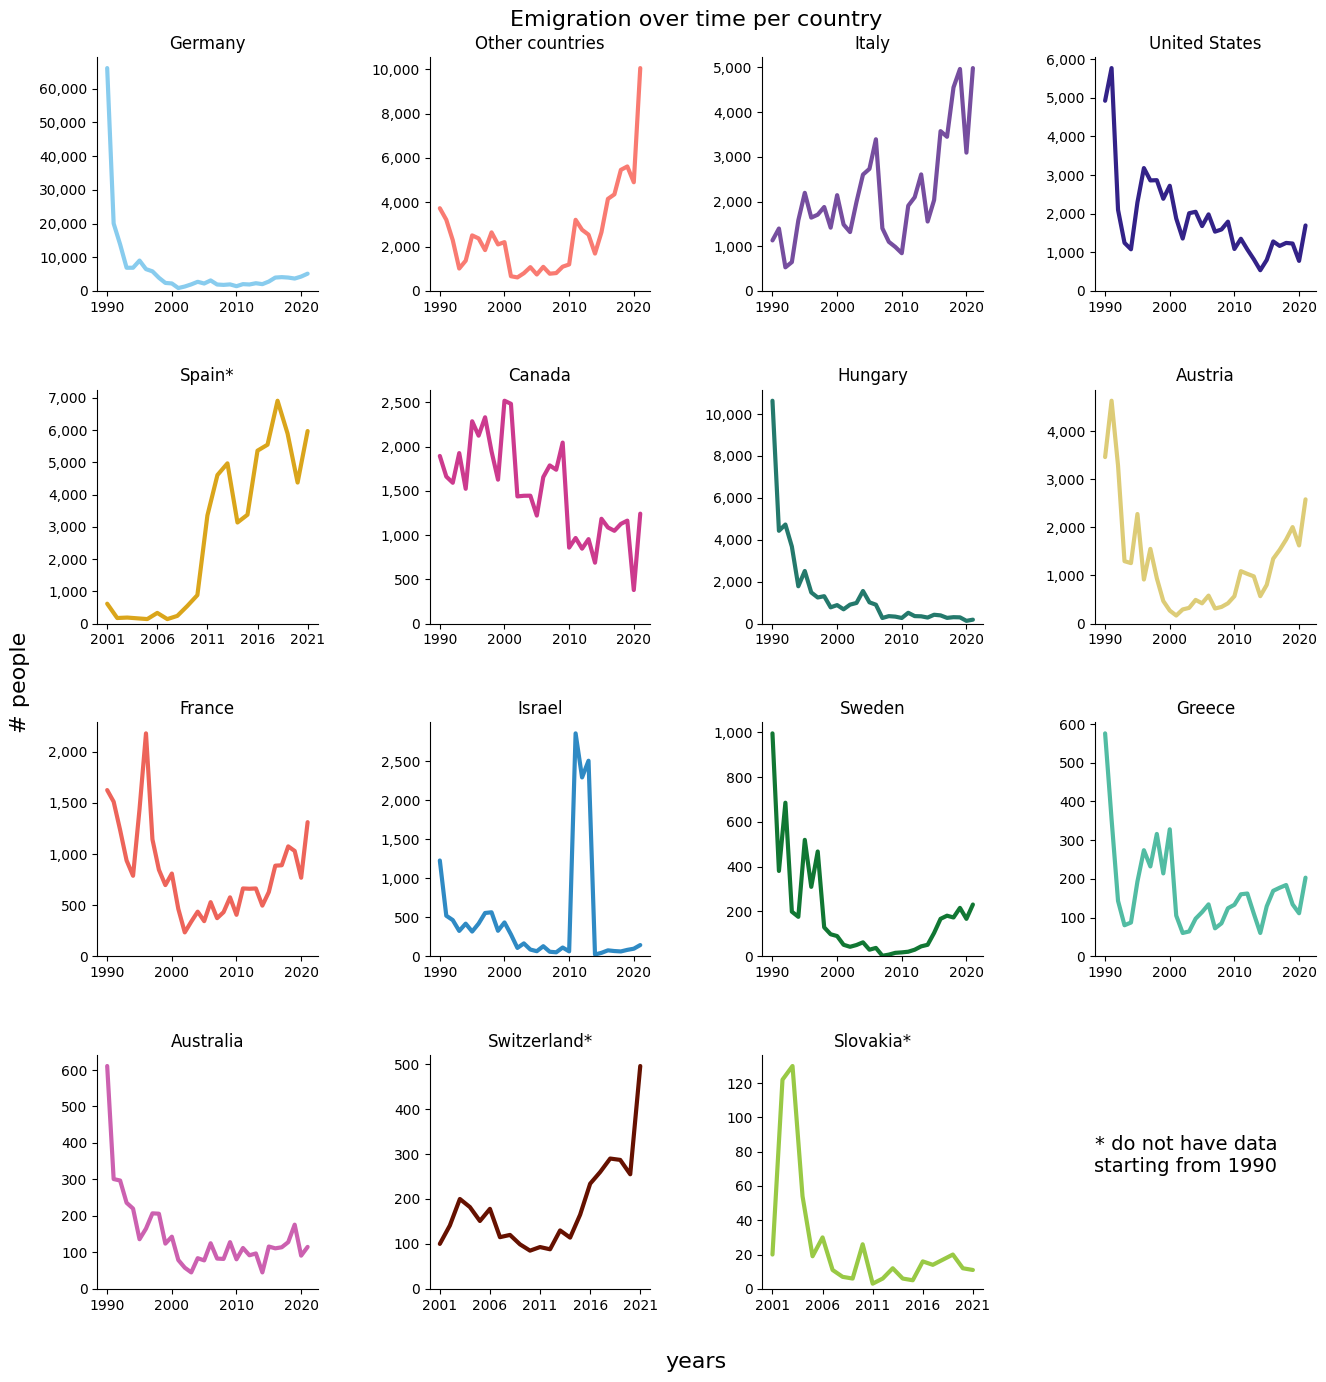

In [64]:
fig, ax = plt.subplots(4, 4, figsize=(14, 14))
fig.tight_layout(pad=5.0)

fig.text(0.5, 0.01, 'years', ha='center', fontsize=16)
fig.text(0.01, 0.5, '# people', va='center', rotation='vertical', fontsize=16)

for i, country in enumerate(list(emigrants_df['country'])):
    row = emigrants_df[emigrants_df['country'] ==  country]#.dropna(axis=1)

    
    from_column = [x for x, y in zip(row.iloc[:, 1:].columns, row.iloc[:, 1:].isnull().values[0]) if not y][0]
    to_column = '2021'
    
    max_no_emigrants = row.loc[:, from_column:to_column].fillna(0).values.max()
    
    idx = int(i/4)
    jdx = i % 4 
    ax[idx, jdx].set_ylim([0, max_no_emigrants + max_no_emigrants * 0.05])

    labels = list(row.loc[:,from_column:to_column].columns)

    color = colors_dict.get(country, colors_dict['Romania']) 
    
    row.loc[:, from_column:to_column].T.plot.line(ax=ax[idx, jdx], label=country, linewidth=3, color=color, solid_capstyle='round')

#     ax[idx, jdx].set_xlim(left = 0)

    ax[idx, jdx].set_yticklabels(['{:,}'.format(int(x)) for x in ax[idx, jdx].get_yticks().tolist()])

    # Hide the right and top spines
    ax[idx, jdx].spines.right.set_visible(False)
    ax[idx, jdx].spines.top.set_visible(False)

    text = '{}{}'.format(country, '' if from_column == '1990' else '*')
    ax[idx, jdx].set_title(text)

    ax[idx, jdx].get_legend().remove()


fig.delaxes(ax[-1, -1])
# ax.annotate(xy=(27, 8000), xytext=(0,0), textcoords='offset points', text='* do not have data\nstarting from 1990', va='center', color='black', fontsize=18)
fig.text(0.85, 0.15, '* do not have data\nstarting from 1990', ha='center', fontsize=14)

fig.suptitle('Emigration over time between 1990-2021 per country', fontsize=16)

In [19]:
emigrants_line_plot = fig

/tmp/ipykernel_6028/2651915473.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[idx, jdx].set_yticklabels(['{:,}'.format(int(x)) for x in ax[idx, jdx].get_yticks().tolist()])


Text(0.5, 0.98, 'Immigration over time between 1994-2021 per country')

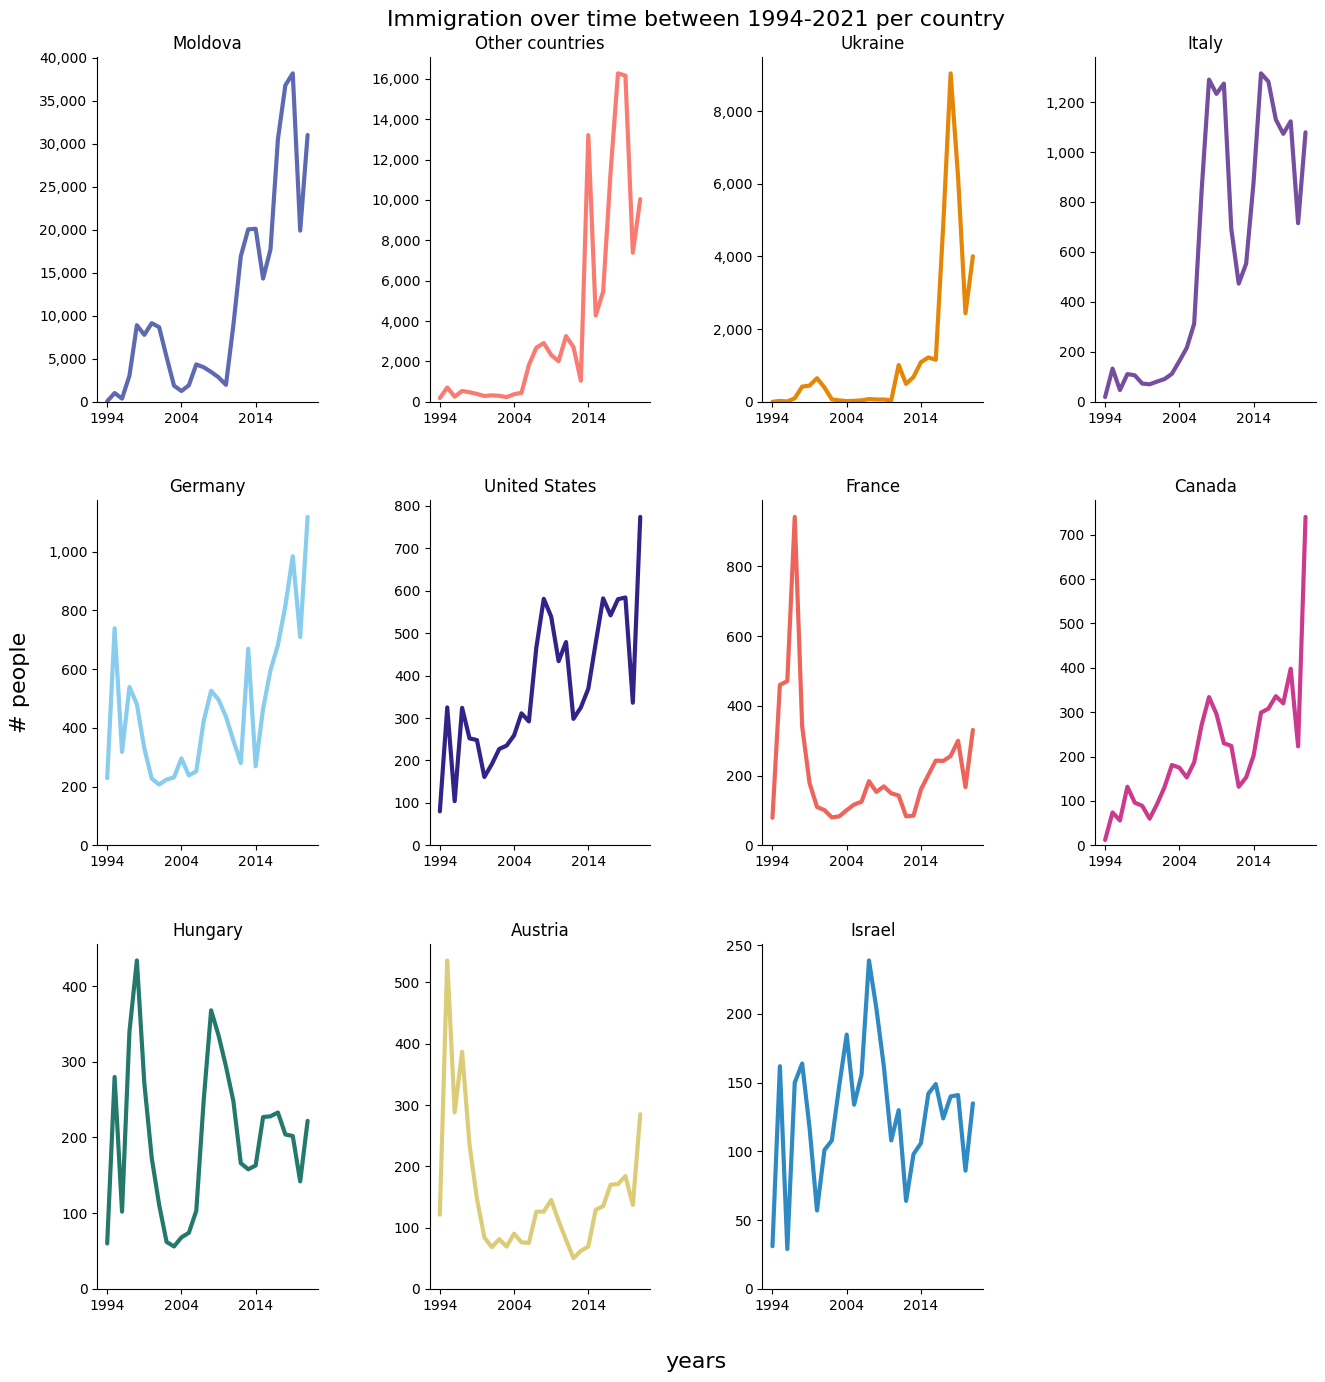

In [11]:
fig, ax = plt.subplots(3, 4, figsize=(14, 14))
fig.tight_layout(pad=5.0)
fig.text(0.5, 0.01, 'years', ha='center', fontsize=16)
fig.text(0.01, 0.5, '# people', va='center', rotation='vertical', fontsize=16)

for i, country in enumerate(list(immigrants_df['country'])):
    row = immigrants_df[immigrants_df['country'] ==  country]#.dropna(axis=1)

    
    from_column = [x for x, y in zip(row.iloc[:, 1:].columns, row.iloc[:, 1:].isnull().values[0]) if not y][0]
    to_column = '2021'
    
    max_no_immigrants = row.loc[:, from_column:to_column].fillna(0).values.max()
    
    idx = int(i/4)
    jdx = i % 4 
    ax[idx, jdx].set_ylim([0, max_no_immigrants + max_no_immigrants * 0.05])

    labels = list(row.loc[:,from_column:to_column].columns)

    color = colors_dict.get(country, colors_dict['Romania']) 

    row.loc[:, from_column:to_column].T.plot.line(ax=ax[idx, jdx], label=country, linewidth=3, color=color, solid_capstyle='round')

#     ax[idx, jdx].set_xlim(left = 0)

    ax[idx, jdx].set_yticklabels(['{:,}'.format(int(x)) for x in ax[idx, jdx].get_yticks().tolist()])

    # Hide the right and top spines
    ax[idx, jdx].spines.right.set_visible(False)
    ax[idx, jdx].spines.top.set_visible(False)

    ax[idx, jdx].set_title(country)

    ax[idx, jdx].get_legend().remove()


fig.delaxes(ax[-1, -1])


fig.suptitle('Immigration over time between 1994-2021 per country', fontsize=16)

In [21]:
immigrants_line_plot = fig

### Emigration and Immigration over time

/tmp/ipykernel_6028/4030933722.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);


Text(0.5, 1.0, 'Emigration and Immigration over time between 1990-2021')

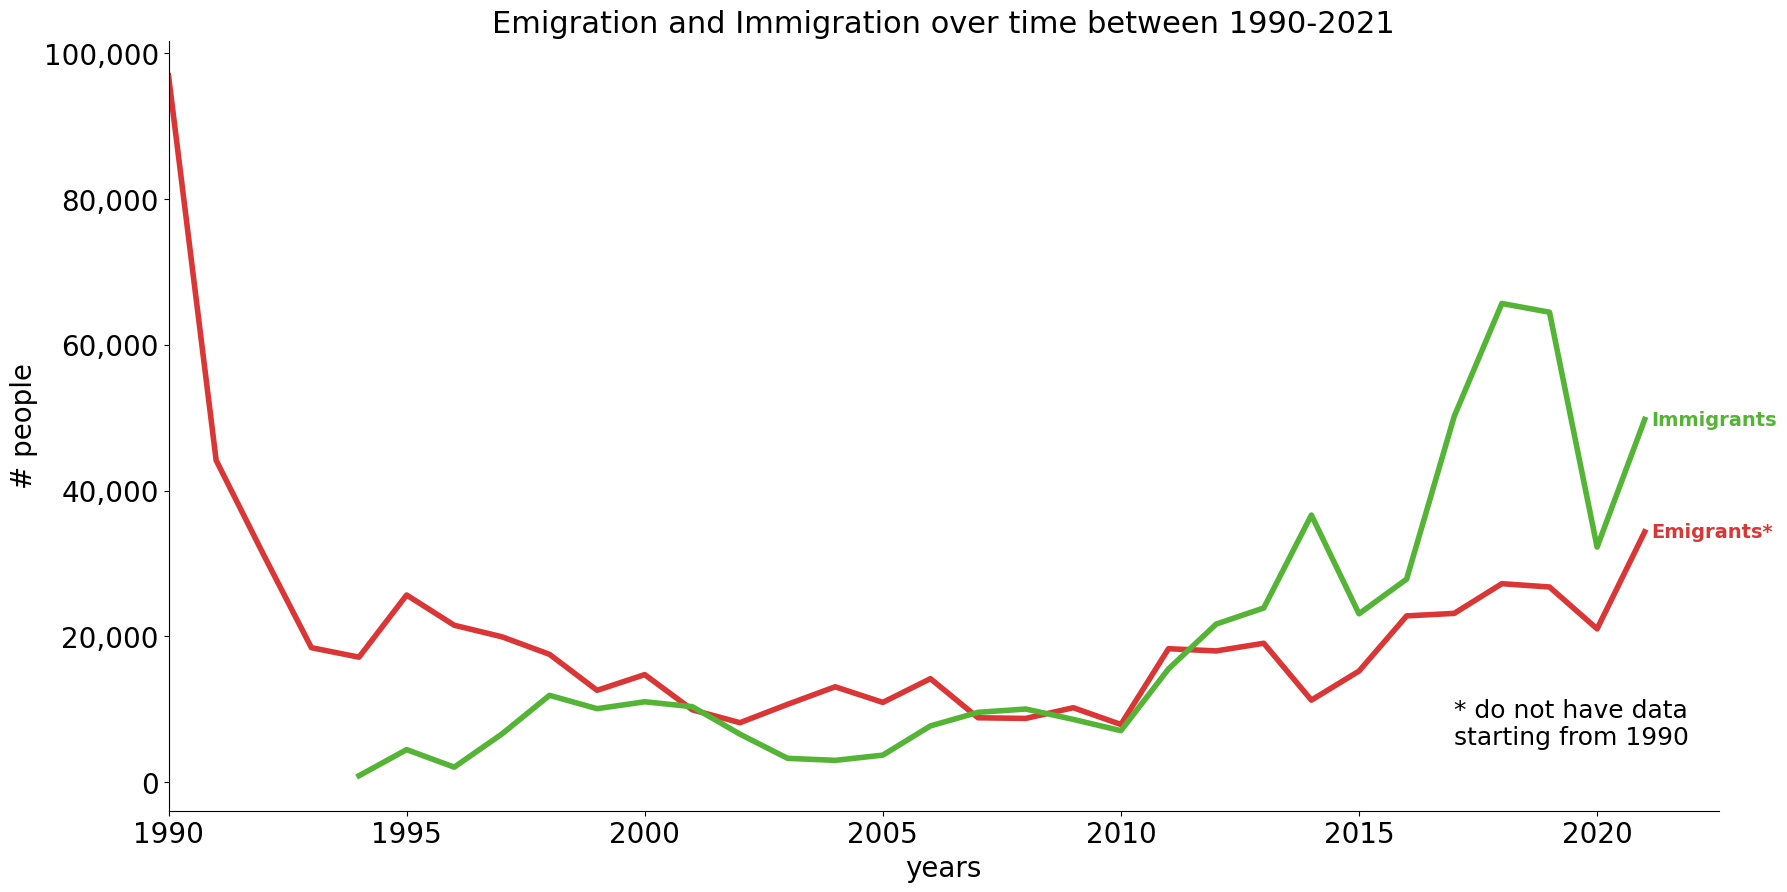

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))

emigrants_sum = emigrants_df.loc[:, '1990':'2021'].sum()
emigrants_sum.plot(lw=4, color='#DC3535')
x = len(emigrants_df.loc[:, '1990':'2021'].columns) - 1
y = emigrants_sum[-1]
ax.annotate(xy=(x, y), xytext=(5,0), textcoords='offset points', text='Emigrants*', va='center', weight='bold', fontsize=14, color=ax.get_lines()[-1].get_color())

immigrants_sum = immigrants_df.loc[:, '1990':'2021'].sum(min_count=1)
immigrants_sum.plot(lw=4, color='#54B435')

x = len(immigrants_df.loc[:, '1990':'2021'].columns) - 1
y = immigrants_sum[-1]
ax.annotate(xy=(x, y), xytext=(5,0), textcoords='offset points', text='Immigrants', va='center', weight='bold', fontsize=14, color=ax.get_lines()[-1].get_color())


ax.set_xlim(left = 0)

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);

ax.set_ylabel('# people', fontsize=20)
ax.set_xlabel('years', fontsize=20)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

ax.annotate(xy=(27, 8000), xytext=(0,0), textcoords='offset points', text='* do not have data\nstarting from 1990', va='center', color='black', fontsize=18)


ax.set_title('Emigration and Immigration over time between 1990-2021', fontsize=22)

In [23]:
emigrants_immigrants_line_plot = fig

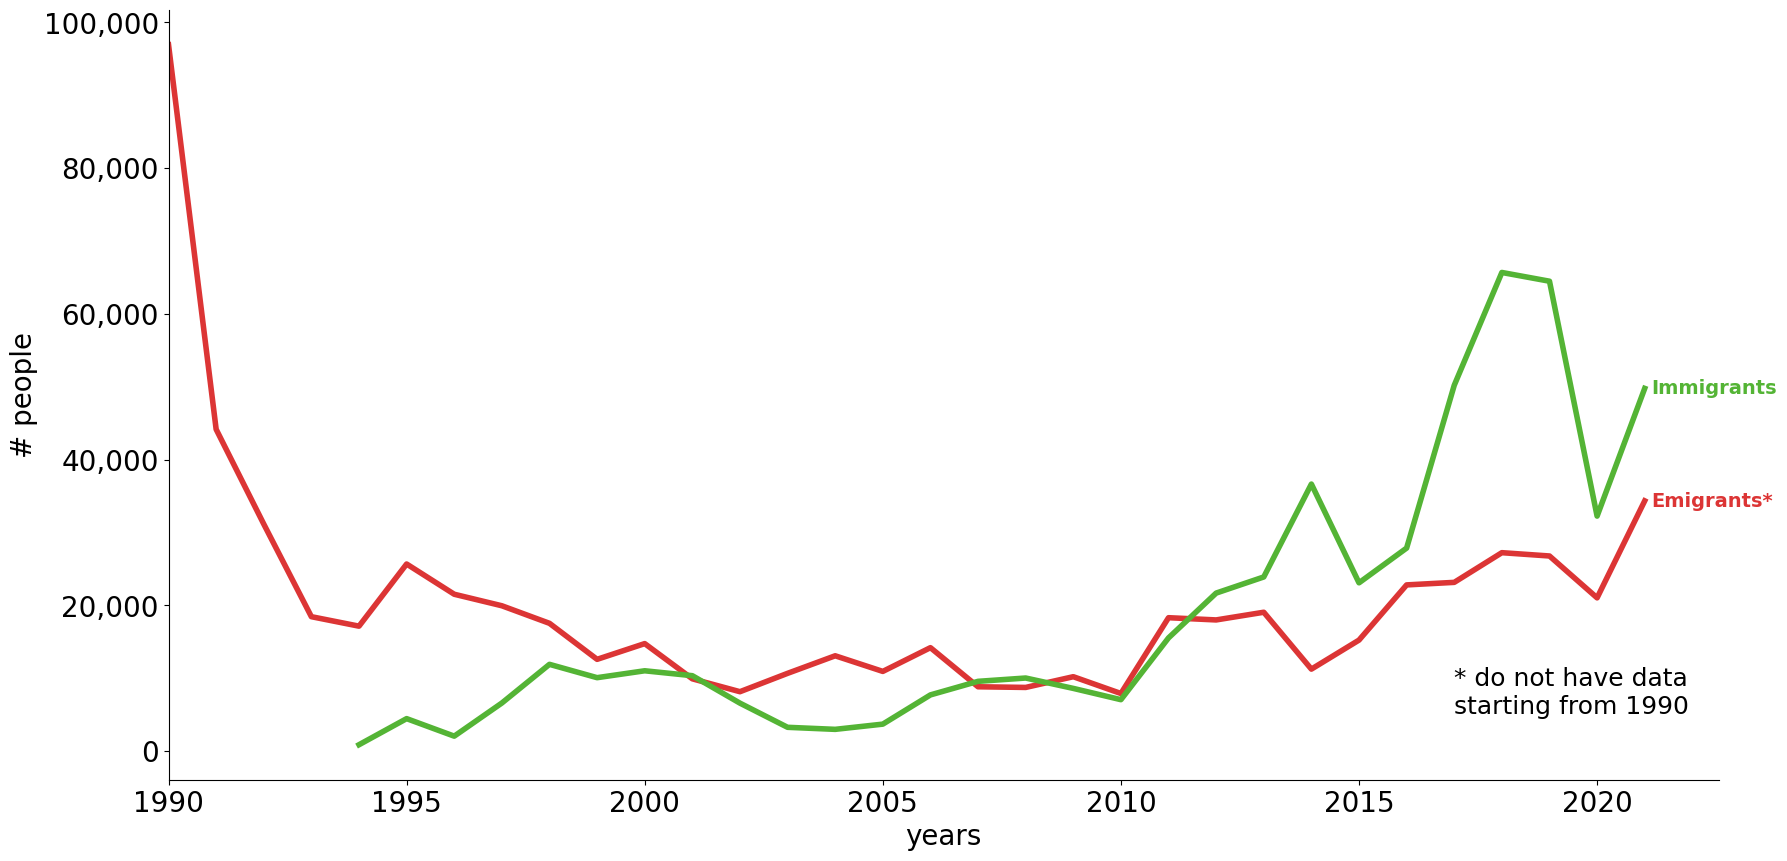

In [35]:
# emigrants_per_country_plot
# immigrants_per_country_plot
# emigrants_top_bottom_5_plot
# immigrants_top_bottom_5_plot
# emigrants_line_plot
# immigrants_line_plot

# emigrants_immigrants_line_plot

### useless code

### Box plot

In [24]:
# fig, ax = plt.subplots(figsize=(8, 8))

# for position, (idx, row) in enumerate(emigrants_df.iterrows()):
#     ax.boxplot(list(row['1990':'2021'].fillna(0)), positions=[position])
#     # break

# # ax.set_xticks(range(position+1))
# ax.set_xticklabels(emigrants_df['country']);
# plt.xticks(rotation = 90, ha='center');


In [25]:
# # vivid #E58606,#5D69B1,#52BCA3,#99C945,#CC61B0,#24796C,#DAA51B,#2F8AC4,#764E9F,#ED645A,#CC3A8E,#A5AA99
# # https://carto.com/carto-colors/

# colors = "#E58606","#5D69B1","#52BCA3","#99C945","#CC61B0","#24796C","#DAA51B","#2F8AC4","#764E9F","#ED645A","#CC3A8E","#A5AA99","#88CCEE","#DDCC77","#117733","#332288"

# colors_dict = dict(zip(emigrants_df['country'], colors))

# fig, ax = plt.subplots(figsize=(10, 10))

# from_column = '1990'
# to_column = '2021'

# max_no_emigrants = emigrants_df.loc[:, from_column:to_column].fillna(0).values.max()
# plt.ylim([0, max_no_emigrants + max_no_emigrants * 0.05])

# labels = list(emigrants_df.loc[:,from_column:to_column].columns)

# for idx, row in emigrants_df.iterrows():
#     color = colors_dict[row[0]]
#     row[from_column:to_column].plot.line(ax=ax, label=row[0], linewidth=3, color=color, solid_capstyle='round')
    
#     x = len(labels) - 1
#     y = row[from_column:to_column].dropna().iloc[-1]
# #     if row[0] == 'Sweden':
# #         y += 1300
# #     elif row[0] == 'Austria':
# #         y += 500
# #     elif row[0] == 'Germany':
# #         y -=400
        
#     if len(row[from_column:to_column].dropna()) != len(row[from_column:to_column]):
#         text = '{}*'.format(row[0])
#     else:
#         text = row[0]
#     ax.annotate(xy=(x, y), xytext=(5,0), textcoords='offset points', text=text, va='center', color=color, weight='bold', fontsize=10)

# # ax.annotate(xy=(24, 2000), xytext=(5,0), textcoords='offset points', text='* do not have data starting from 1990', va='center', color='black', fontsize=10)

# ax.set_xticks(ticks=range(len(labels)), labels=labels, rotation=45)

# ax.set_xlim(left = 0)

# ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

# # Hide the right and top spines
# ax.spines.right.set_visible(False)
# ax.spines.top.set_visible(False)

# plt.locator_params(axis='x', nbins=11);
# # plt.title('GDP per capita (current US$) between 1990 and 2021', loc='center', fontdict={'fontsize':20});